D1128_WORK_김현우

모듈 로딩 <hr>

In [373]:
import pandas as pd
import numpy as np
import requests
import gdown
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

# 03. 데이터 정제하기

# 03-1 불필요한 데이터 삭제하기

## 열 삭제하기

In [374]:
# 03-1. 불필요한 데이터 삭제하기
FILE_NAME = './DATA/ns_202104.csv'

In [375]:
ns_df = pd.read_csv(FILE_NAME)
display(ns_df.head())

C:\Users\khw27\AppData\Local\Temp\ipykernel_21980\423772296.py:1: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ns_df = pd.read_csv(FILE_NAME)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


In [376]:
ns_book = ns_df.loc[:, '번호':'등록일자']
display(ns_book)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401677,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
401678,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
401679,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
401680,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


In [377]:
print(ns_df.columns)
print(ns_df.columns[0])

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자', 'Unnamed: 13'],
      dtype='object')
번호


In [378]:
ns_df.columns != 'Unnamed: 13'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [379]:
selected_columns = ns_df.columns == '번호'
ns_book = ns_df.loc[:, selected_columns]
display(ns_book.head())

,번호
0,1
1,2
2,3
3,4
4,5


In [380]:
selected_columns = ns_df.columns != "부가기호"
ns_book = ns_df.loc[:, selected_columns]
display(ns_book.head())

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,1,0,2021-03-19,NaN


In [381]:
ns_book = ns_df.drop('Unnamed: 13', axis=1)
display(ns_book.head())

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [382]:
try:
    if(ns_book.columns not in '주제분류번호'):
        ns_book.drop('주제분류번호', axis=1, inplace=True)
        display(ns_book.head())

except:
    print("존재하지 않는 컬럼입니다.")

존재하지 않는 컬럼입니다.


In [383]:
print(ns_book.isnull().sum().sum())
ns_book.dropna(axis=1)
ns_book.head()

775612


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [384]:
print(ns_df.isnull().sum().sum())
ns_book = ns_df.dropna(axis=1, how='all')
print(ns_book.head())
print(ns_book.isnull().sum().sum())


1177294
   번호                    도서명                저자    출판사  발행년도           ISBN  \
0   1                인공지능과 흙            김동훈 지음    민음사  2021  9788937444319   
1   2           가짜 행복 권하는 사회            김태형 지음   갈매나무  2021  9791190123969   
2   3  나도 한 문장 잘 쓰면 바랄 게 없겠네            김선영 지음   블랙피쉬  2021  9788968332982   
3   4                예루살렘 해변  이도 게펜 지음, 임재희 옮김  문학세계사  2021  9788970759906   
4   5  김성곤의 중국한시기행 : 장강·황하 편            김성곤 지음    김영사  2021  9788934990833   

  세트 ISBN 부가기호    권 주제분류번호  도서권수  대출건수        등록일자  
0     NaN  NaN  NaN    NaN     1     0  2021-03-19  
1     NaN  NaN  NaN    NaN     1     0  2021-03-19  
2     NaN  NaN  NaN    NaN     1     0  2021-03-19  
3     NaN  NaN  NaN    NaN     1     0  2021-03-19  
4     NaN  NaN  NaN    NaN     1     0  2021-03-19  
775612


## 행 삭제하기

In [385]:
ns_book2 = ns_book.drop([0, 1])
display(ns_book)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401677,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
401678,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
401679,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
401680,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


In [386]:
ns_book2 = ns_book[2:]
display(ns_book2.head())

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
5,6,처음 읽는 음식의 세계사,"미야자키 마사카츠 지음, 한세희 옮김",탐나는책,2021,9791189550370,NaN,NaN,NaN,NaN,1,0,2021-03-19
6,7,아르센 벵거 자서전 My Life in Red and White,"아르센 벵거 지음, 이성모 옮김",한즈미디어(한스미디어),2021,9791160075793,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [387]:
ns_book2 = ns_book[0:2]
display(ns_book2.head())

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [388]:
selected_rows = ns_df['출판사'] == '한빛미디어'
ns_book2 = ns_df[selected_rows]
# ns_book2 = ns_df.loc[selected_rows]
display(ns_book2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
60,61,(맛있는 디자인)프리미어 프로 CC: 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원,심수진,윤성우,김덕영 지음",한빛미디어,2021,9791162244029,NaN,1,2021,005.567,1,1,2021-03-15,NaN
70,71,처음 배우는 애저 (Azure Portal로 배우는 애저 도입부터 활용까지),김도균,한빛미디어,2020,9791162243695,NaN,NaN,NaN,005.74,1,1,2021-03-15,NaN
88,89,맛있는 디자인 프리미어 프로 CC 2021 - 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원, 심수진, 윤성우, 김덕영 (지은이)",한빛미디어,2021,9791162244029,NaN,NaN,NaN,NaN,0,0,2021-03-15,NaN
156,157,"실전 보고서 작성 기술 with 파워포인트, 워드, 한글",홍장표 지음,한빛미디어,2020,9791162243763,NaN,NaN,NaN,NaN,1,0,2021-03-12,NaN
198,199,처음 배우는 리액트 네이티브,김범준 지음,한빛미디어,2021,9791162243879,NaN,NaN,NaN,NaN,1,0,2021-03-12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383334,383335,보이지 않는 핵 전환하는 Nuclear,이마이 류키치 지음,한빛미디어,1995,9788979140026,NaN,0,NaN,349.9,1,0,1970-01-01,NaN
384891,384892,리눅스 커널의 이해,다니엘 보베이,한빛미디어,2001,9788979141597,NaN,1,NaN,566.843,1,0,1970-01-01,NaN
385028,385029,C로 구현한 알고리즘,카일 루든 지음,한빛미디어,2001,9788979140637,NaN,1,NaN,566.813,1,0,1970-01-01,NaN
385521,385522,WML과 WML 스크립트 시작하기,마틴 프로스트 지음,한빛미디어,2001,9788979141160,NaN,1,NaN,566.8133,1,0,1970-01-01,NaN


In [389]:
ns_book2 = ns_book[ns_book['대출건수'] > 1000]
display(ns_book2.head())

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
94781,94782,"사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문",유발 하라리 지음 ;조현욱 옮김,김영사,2016,9788934972464,NaN,NaN,NaN,909.0,30,1468,2016-04-22
346944,346945,해커스 토익:Listening,David Cho 지음,해커스어학연구소,2005,9788990700148,NaN,1,NaN,740.77,29,1065,2005-02-01


## 중복된 행 찾기

In [390]:
print(sum(ns_book.duplicated()))

ns_book.duplicated(subset=['도서명', '저자', 'ISBN']).sum()

0


np.int64(20191)

In [391]:
dup_rows = ns_book.duplicated(subset=['도서명', '저자', 'ISBN'], keep=False)
ns_book3 = ns_book[dup_rows]
display(ns_book3)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
109,110,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129815,9788970129808,0,1,843.6,1,0,2021-03-12
110,111,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129822,9788970129808,0,2,843.6,1,0,2021-03-12
111,112,보건교사 안은영 :정세랑 장편소설,지은이: 정세랑,민음사,2021,9788937479953,NaN,0,NaN,813.7,1,0,2021-03-12
112,113,보건교사 안은영 :정세랑 장편소설,지은이: 정세랑,민음사,2021,9788937479953,NaN,0,NaN,813.7,1,1,2021-03-12
113,114,스토너,존 윌리엄스 지음 ;김승욱 옮김,RHK(알에이치코리아),2021,9788925538297,NaN,0,NaN,843.5,1,0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401656,401657,韓國人의 意識構造,李圭泰 著,과천문화원,1977,9788986556193,NaN,NaN,1,041,1,0,1970-01-01
401657,401658,(대하무협소설)대도무문,사마달,시공사,1995,9788972591863,NaN,NaN,8,813.6,1,0,1970-01-01
401663,401664,韓國義賊小說史,張良守 著,미진사,1991,9788940800508,NaN,NaN,NaN,813.09,1,0,1970-01-01
401669,401670,바다의 역사,한국과학기술진흥재단 편,우석,1984,9788936102609,NaN,NaN,NaN,454,1,0,1970-01-01


In [392]:
count_df = ns_book[['도서명', '저자', 'ISBN', '권', '대출건수']]

group_df = count_df.groupby(by=['도서명', '저자', 'ISBN', '권'], dropna=False)

loan_count = group_df.sum()
display(loan_count)

대출건수
도서명                                             저자                       ISBN          권        
 (꼭 필요한 것부터 쉽게 배우는) 자신만만 블로그 차근차근 배우기           김상현 지음                   9788955025637 NaN    38
 (맨처음 배우는) 세상의 직업                               엘레오노라 바르소티 글 ·그림 ;김태은 옮김 9788992924146 NaN    10
 (영잘원 리스닝과 패턴 영어의 절묘한 만남으로 태어난 ) 리스닝 ABC : 입문편  JD Kim 지음                9788993466089 NaN     4
 (즉석에서 바로바로 활용하는) 일상생활 베트남어 첫걸음                 FL4U컨텐츠 지음               9788971728000 NaN     3
 ,에게                                            이기린(이진희)                 9791196137014 NaN     0
...                                                                                          ...
NaN                                             히라야마 쯔요시 외 5인            9788997924318 NaN     0
                                                ？德峰(Yang Defeng)         9788960716957 NaN     0
                                                NaN                      9788971990155 NaN     2
                                                                         9788972803997 NaN     0
                                                                         9788973561537 NaN     0

[386354 rows x 1 columns]

In [393]:
loan_count = count_df.groupby(by=['도서명', '저자', 'ISBN', '권'], dropna=False).sum()
display(loan_count)

대출건수
도서명                                             저자                       ISBN          권        
 (꼭 필요한 것부터 쉽게 배우는) 자신만만 블로그 차근차근 배우기           김상현 지음                   9788955025637 NaN    38
 (맨처음 배우는) 세상의 직업                               엘레오노라 바르소티 글 ·그림 ;김태은 옮김 9788992924146 NaN    10
 (영잘원 리스닝과 패턴 영어의 절묘한 만남으로 태어난 ) 리스닝 ABC : 입문편  JD Kim 지음                9788993466089 NaN     4
 (즉석에서 바로바로 활용하는) 일상생활 베트남어 첫걸음                 FL4U컨텐츠 지음               9788971728000 NaN     3
 ,에게                                            이기린(이진희)                 9791196137014 NaN     0
...                                                                                          ...
NaN                                             히라야마 쯔요시 외 5인            9788997924318 NaN     0
                                                ？德峰(Yang Defeng)         9788960716957 NaN     0
                                                NaN                      9788971990155 NaN     2
                                                                         9788972803997 NaN     0
                                                                         9788973561537 NaN     0

[386354 rows x 1 columns]

In [394]:
display(ns_book)
dup_rows = ns_book.duplicated(subset=['도서명', '저자', 'ISBN', '권'])

unique_rows = ~dup_rows
display(unique_rows)

ns_book3 = ns_book[unique_rows].copy()
display(ns_book3)

ns_book3.duplicated().sum()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401677,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
401678,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
401679,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
401680,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


0         True
1         True
2         True
3         True
4         True
          ... 
401677    True
401678    True
401679    True
401680    True
401681    True
Length: 401682, dtype: bool

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401677,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
401678,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
401679,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
401680,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


np.int64(0)

In [395]:
try:
    ns_book3.set_index(['도서명', '저자', 'ISBN', '권'], inplace=True)
    display(ns_book3.head())
except:
    print("이미 인덱스로 설정되어 있는 컬럼입니다.")
    display(ns_book3.head())

,,,,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
도서명,저자,ISBN,권,,,,,,,,,
인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


In [396]:
ns_book3.update(loan_count)
ns_book3.head()

,,,,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
도서명,저자,ISBN,권,,,,,,,,,
인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


In [397]:
ns_book4 = ns_book3.reset_index()
ns_book4

,도서명,저자,ISBN,권,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
0,인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
1,가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
2,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
3,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
4,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386349,韓國現代詩大系,채만묵 編著,9788977352971,3,401678,한국문화사,1996,9788977352988.0,NaN,811.608,1,0,1970-01-01
386350,뉴 웨이브,제임스 모나코 지음,9788985367448,2,401679,한나래,1996,9788985367424.0,NaN,688.04,1,0,1970-01-01
386351,(최인훈 장편소설)화두,최인훈 지음,9788937401596,2,401680,민음사,1994,9788937401589.0,NaN,813.6,1,0,1970-01-01
386352,독일 문학과 세계 문학,吳漢鎭 編著,9788947700368,3,401681,벽호,1995,9788947700405.0,NaN,809.05,2,0,1970-01-01


In [398]:
(ns_book['대출건수'] > 100).sum()

np.int64(2311)

In [399]:
(ns_book4['대출건수'] > 100).sum()

np.int64(2518)

In [400]:
ns_book4 = ns_book4[ns_book.columns]
ns_book4

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386349,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
386350,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
386351,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
386352,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


In [401]:
ns_book4.to_csv("ns_book4.csv", index=False)

In [402]:
def data_cleaning(FILE_NAME):
    """
    남산 도서관 장서 CSV 데이터 전처리 함수

    :param filename: CSV 파일이름
    """

    # 파일을 데이터프레임으로 읽습니다.
    
    dataDF = pd.read_csv(FILE_NAME, low_memory=False)

    # NaN인 열을 삭제합니다.
    dataDF.dropna(axis=1, how='all', inplace=True)

    # 대출건수를 합치기 위해 필요한 행만 추출하여 count_df 데이터프레임을 만듭니다.
    countDF = dataDF[['도서명', '저자', 'ISBN', '권', '대출건수']]

    # 도서명, 저자, ISBN, 권을 기준으로 대출건수를 groupby합니다.
    countDF.groupby(by=['도서명', '저자', 'ISBN', '권'], dropna=False).sum()

    # 원본 데이터프레임에서 중복된 행을 제외하고 고유한 행만 추출하여 복사합니다.
    dupROWS = dataDF.duplicated(subset=['도서명', '저자', 'ISBN', '권'])
    uniqueROWS = ~dupROWS
    ns_book3 = ns_book[uniqueROWS.copy()]

    # 도서명, 저자, ISBN, 권을 인덱스로 설정합니다.
    ns_book3.set_index(['도서명', '저자', 'ISBN', '권'], inplace=True)

    # load_count에 저장된 누적 대출건수를 업데이트합니다.
    ns_book3.update(loan_count)

    # 인덱스를 재설정합니다.
    ns_book4 = ns_book3.reset_index()

    # 원본 데이터프레임의 열 순서로 변경합니다.
    ns_book4 = ns_book4[dataDF.columns]

    return ns_book4

In [403]:
new_ns_book4 = data_cleaning('./DATA/ns_202104.csv')
ns_book4.equals(new_ns_book4)

False

# 3-1) 확인문제

1. 다음 df 데이터프레임에서 'col2'열만 삭제하는 명령으로 올바른 것은 무엇인가요?
- (1) df.drop('col2', axis=1)

2. 1번 문제의 df 데이터프레임에서 'col1'열의 합을 계산하는 명령으로 올바르지 않은 것은 무엇인가요?
- (3) df.loc[:, [False, False, True]].sum()
    - col3 열을 계산하게 됨


3. 1번 문제의 df 데이터프레임에서 세 번째 행을 골라내는 명령으로 맞지 않는 것은 무엇인가요?
- (2) df[df['col3'] > 100]
    - 100 이상인 행이 존재하지 않으므로 틀렸음

4. 다음 df 데이터프레임에서 중복된 행을 삭제하는 명령으로 올바르지 않은 것은 무엇인가요?
- (3) df[~df.duplicated(keep=False)]
    - keep=False 사용시 중복된 행을 모두 삭제하게 됨

5. 4번 문제의 df 데이터프레임에서 groupby() 메서드로 'col3'열을 올바르게 더하지 못한 것은 무엇인가요?
- (3) df.group(by=['col1', 'col2']).sum()
    - 데이터프레임에는 group()이라는 메서드가 존재하지 않음

# 03-2 잘못된 데이터 수정하기

## 데이터프레임 정보 요약 확인하기

In [404]:
FILE_NAME = './DATA/ns_book6.csv'
ns_book4 = pd.read_csv(FILE_NAME)
display(ns_book4.head())

C:\Users\khw27\AppData\Local\Temp\ipykernel_21980\4063502794.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ns_book4 = pd.read_csv(FILE_NAME)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [405]:
ns_book4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379976 entries, 0 to 379975
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       379976 non-null  int64  
 1   도서명      379976 non-null  object 
 2   저자       379976 non-null  object 
 3   출판사      379976 non-null  object 
 4   발행년도     379976 non-null  float64
 5   ISBN     379976 non-null  object 
 6   세트 ISBN  56544 non-null   object 
 7   부가기호     308589 non-null  object 
 8   권        62092 non-null   object 
 9   주제분류번호   360247 non-null  object 
 10  도서권수     379976 non-null  int64  
 11  대출건수     379976 non-null  int64  
 12  등록일자     379976 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 37.7+ MB


In [406]:
ns_book4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379976 entries, 0 to 379975
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       379976 non-null  int64  
 1   도서명      379976 non-null  object 
 2   저자       379976 non-null  object 
 3   출판사      379976 non-null  object 
 4   발행년도     379976 non-null  float64
 5   ISBN     379976 non-null  object 
 6   세트 ISBN  56544 non-null   object 
 7   부가기호     308589 non-null  object 
 8   권        62092 non-null   object 
 9   주제분류번호   360247 non-null  object 
 10  도서권수     379976 non-null  int64  
 11  대출건수     379976 non-null  int64  
 12  등록일자     379976 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 240.4 MB


## 누락된 값 처리하기

In [407]:
ns_book4.isna().sum()

번호              0
도서명             0
저자              0
출판사             0
발행년도            0
ISBN            0
세트 ISBN    323432
부가기호        71387
권          317884
주제분류번호      19729
도서권수            0
대출건수            0
등록일자            0
dtype: int64

In [408]:
ns_book4.notna().sum()

번호         379976
도서명        379976
저자         379976
출판사        379976
발행년도       379976
ISBN       379976
세트 ISBN     56544
부가기호       308589
권           62092
주제분류번호     360247
도서권수       379976
대출건수       379976
등록일자       379976
dtype: int64

In [409]:
ns_book4.loc[0, '도서권수'] = None
ns_book4.isna().sum()

ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,NaN,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1.0,0,2021-03-19


In [410]:
ns_book4.loc[0, '도서권수'] = 1
ns_book4.head(2)

ns_book4 = dataDF.astype({'도서권수':'int32', '대출건수':'int32'})
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [411]:
ns_book4.loc[0, '부가기호'] = None
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,None,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [412]:
ns_book4.loc[0, '부가기호'] = np.nan
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [413]:
set_isbn_na_rows = ns_book4['세트 ISBN'].isna()

ns_book4.loc[set_isbn_na_rows, '세트 ISBN'] = ''
ns_book4['세트 ISBN'].isna().sum()

np.int64(0)

In [414]:
ns_book4.fillna('없음').isna().sum()

번호         0
도서명        0
저자         0
출판사        0
발행년도       0
ISBN       0
세트 ISBN    0
부가기호       0
권          0
주제분류번호     0
도서권수       0
대출건수       0
등록일자       0
dtype: int64

In [415]:
ns_book4['부가기호'].fillna('없음').isna().sum()

np.int64(0)

In [416]:
ns_book4.fillna({'부가기호':'없음'}).isna().sum()

번호              0
도서명             0
저자              0
출판사             0
발행년도            0
ISBN            0
세트 ISBN         0
부가기호            0
권          317884
주제분류번호      19729
도서권수            0
대출건수            0
등록일자            0
dtype: int64

In [417]:
ns_book4.replace(np.nan, '없음').isna().sum()

번호         0
도서명        0
저자         0
출판사        0
발행년도       0
ISBN       0
세트 ISBN    0
부가기호       0
권          0
주제분류번호     0
도서권수       0
대출건수       0
등록일자       0
dtype: int64

In [418]:
ns_book4.replace([np.nan, '2021'], ['없음', '21']).head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,없음,없음,없음,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,없음,없음,없음,1,0,2021-03-19


In [419]:
ns_book4.replace({np.nan:'없음', '2021':'21'}).head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,없음,없음,없음,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,없음,없음,없음,1,0,2021-03-19


In [420]:
ns_book4.replace({'부가기호':np.nan}, '없음').head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,없음,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,없음,NaN,NaN,1,0,2021-03-19


In [421]:
ns_book4.replace({'부가기호': {np.nan: '없음'}, 
                  '발행년도': {'2021': '21'}}).head(2)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,없음,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,없음,NaN,NaN,1,0,2021-03-19


## 정규 표현식

In [422]:
ns_book4.replace({'발행년도': {'2021': '21'}})[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드 (지은이), 김진웅 (옮긴이)",좋은씨앗,2018.0,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아 (지은이), 안기순 (옮긴이)",부키,2021.0,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


In [423]:
ns_book4.replace({'발행년도': {r'\d{2}(\d{2})': r'\1'}}, regex=True)[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드 (지은이), 김진웅 (옮긴이)",좋은씨앗,2018.0,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아 (지은이), 안기순 (옮긴이)",부키,2021.0,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


In [424]:
ns_book4.replace({'발행년도': {r'\d{2}(\d{2})': r'\1'}}, regex=True)[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드 (지은이), 김진웅 (옮긴이)",좋은씨앗,2018.0,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아 (지은이), 안기순 (옮긴이)",부키,2021.0,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


In [425]:
ns_book4.replace({'저자': {r'(.*)\s\(지은이\)(.*)\s\(옮긴이\)': r'\1\2'},
                  '발행년도': {r'\d{2}(\d{2})': r'\1'}}, regex=True)[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드, 김진웅",좋은씨앗,2018.0,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아, 안기순",부키,2021.0,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


## 잘못된 값 바꾸기

In [426]:
# 아래 코드는 오류 발생
# ns_book4.astype({'발행년도': 'int32'})

In [427]:
# ns_book4['발행년도'].str.contains('1988').sum()
ns_book4['발행년도'].astype(str).str.contains('1988').sum()



np.int64(388)

In [428]:
invalid_number = ns_book4['발행년도'].astype(str).str.contains('\D', na=True)
print(invalid_number.sum())
ns_book4[invalid_number].head()

379976


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,,NaN,NaN,NaN,1,0,2021-03-19


In [429]:
ns_book5 = ns_book4.replace({'발행년도':r'.*(\d{4}).*'}, r'\1', regex=True)
ns_book5[invalid_number].head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,,NaN,NaN,NaN,1,0,2021-03-19


In [430]:
# ns_book5 컬럼을 문자열로 영구 변환
ns_book5['발행년도'] = ns_book5['발행년도'].astype(str)

# 이제 .str 사용 가능
unkown_year = ns_book5['발행년도'].str.contains('\D', na=True)
print(unkown_year.sum())
ns_book5[unkown_year].head()


379976


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,,NaN,NaN,NaN,1,0,2021-03-19


In [431]:
ns_book5.loc[unkown_year, '발행년도'] = '-1'
ns_book5 = ns_book5.astype({'발행년도': 'int32'})

In [432]:
ns_book5['발행년도'].gt(4000).sum()

np.int64(0)

In [433]:
dangun_yy_rows = ns_book5['발행년도'].gt(4000)
ns_book5.loc[dangun_yy_rows, '발행년도'] = ns_book5.loc[dangun_yy_rows, '발행년도'] - 2333

In [434]:
dangun_year = ns_book5['발행년도'].gt(4000)
print(dangun_year.sum())
ns_book5[dangun_year].head(2)

0


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자


In [435]:
ns_book5.loc[dangun_year, '발행년도'] = -1

In [436]:
old_books = ns_book5['발행년도'].gt(0) & ns_book5['발행년도'].lt(1900)
ns_book5[old_books]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자


In [437]:
ns_book5.loc[old_books, '발행년도'] = -1


In [438]:
ns_book5['발행년도'].eq(-1).sum()

np.int64(379976)

## 누락된 정보 채우기

In [439]:
na_rows = ns_book5['도서명'].isna() | ns_book5['저자'].isna() \
          | ns_book5['출판사'].isna() | ns_book5['발행년도'].eq(-1)
print(na_rows.sum())
ns_book5[na_rows].head(2)

379976


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,-1,9788937444319,,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,-1,9791190123969,,NaN,NaN,NaN,1,0,2021-03-19


In [440]:
# DH_KEY_TOO_SMALL 에러가 발생하는 경우 다음 코드의 주석을 제거하고 실행하세요.
# https://stackoverflow.com/questions/38015537/python-requests-exceptions-sslerror-dh-key-too-small
# import requests

# requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS += 'HIGH:!DH:!aNULL'
# try:
#     requests.packages.urllib3.contrib.pyopenssl.DEFAULT_SSL_CIPHER_LIST += 'HIGH:!DH:!aNULL'
# except AttributeError:
#     # no pyopenssl support used / needed / available
#     pass

In [441]:
def get_book_title(isbn):
    # Yes24 도서 검색 페이지 URL
    url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
    # URL에 ISBN을 넣어 HTML 가져옵니다.
    r = requests.get(url.format(isbn))
    soup = BeautifulSoup(r.text, 'html.parser')   # HTML 파싱
    # 클래스 이름이 'gd_name'인 a 태그의 텍스트를 가져옵니다.
    title = soup.find('a', attrs={'class':'gd_name'}) \
            .get_text()
    return title

In [442]:
get_book_title(9791191266054)

'골목의 시간을 그리다'

In [443]:
import re

def get_book_info(row):
    title = row['도서명']
    author = row['저자']
    pub = row['출판사']
    year = row['발행년도']
    # Yes24 도서 검색 페이지 URL
    url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
    # URL에 ISBN을 넣어 HTML 가져옵니다.
    r = requests.get(url.format(row['ISBN']))
    soup = BeautifulSoup(r.text, 'html.parser')   # HTML 파싱
    try:
        if pd.isna(title):
            # 클래스 이름이 'gd_name'인 a 태그의 텍스트를 가져옵니다.
            title = soup.find('a', attrs={'class':'gd_name'}) \
                    .get_text()
    except AttributeError:
        pass

    try:
        if pd.isna(author):
            # 클래스 이름이 'info_auth'인 span 태그 아래 a 태그의 텍스트를 가져옵니다.
            authors = soup.find('span', attrs={'class':'info_auth'}) \
                          .find_all('a')
            author_list = [auth.get_text() for auth in authors]
            author = ','.join(author_list)
    except AttributeError:
        pass

    try:
        if pd.isna(pub):
            # 클래스 이름이 'info_auth'인 span 태그 아래 a 태그의 텍스트를 가져옵니다.
            pub = soup.find('span', attrs={'class':'info_pub'}) \
                      .find('a') \
                      .get_text()
    except AttributeError:
        pass

    try:
        if year == -1:
            # 클래스 이름이 'info_date'인 span 태그 아래 텍스트를 가져옵니다.
            year_str = soup.find('span', attrs={'class':'info_date'}) \
                           .get_text()
            # 정규식으로 찾은 값 중에 첫 번째 것만 사용합니다.
            year = re.findall(r'\d{4}', year_str)[0]
    except AttributeError:
        pass

    return title, author, pub, year

In [444]:
updated_sample = ns_book5[na_rows].head(2).apply(get_book_info,
    axis=1, result_type ='expand')
updated_sample

,0,1,2,3
0,인공지능과 흙,김동훈 지음,민음사,2021
1,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021


In [445]:
# ns_book5_update = ns_book5[na_rows].apply(get_book_info,
#     axis=1, result_type ='expand')

# ns_book5_update.columns = ['도서명','저자','출판사','발행년도']
# ns_book5_update.head()

In [446]:
gdown.download('http://bit.ly/3UJZiHw', 'ns_book5_update.csv', quiet=False)

ns_book5_update = pd.read_csv('ns_book5_update.csv', index_col=0)
ns_book5_update.head()

Downloading...
From: http://bit.ly/3UJZiHw
To: c:\Users\khw27\바탕 화면\SL_KDT_10\07_STATISTICS\ns_book5_update.csv
100%|██████████| 406k/406k [00:00<00:00, 2.62MB/s]


,도서명,저자,출판사,발행년도
78,아산 정주영 레거시,김화진,서울대학교출판문화원,2021
265,골목의 시간을 그리다,정명섭.김효찬 지음,초록비책공방,2021
354,한국인의 맛,정명섭 지음,추수밭,2021
539,"한성부, 달 밝은 밤에",김이삭 지음,고즈넉이엔티,2021
607,100일 완성 마그마 러시아어 중고급 단어장,러포자 구제 연구소 외 지음,문예림,2021


In [447]:
ns_book5.update(ns_book5_update)

na_rows = ns_book5['도서명'].isna() | ns_book5['저자'].isna() \
          | ns_book5['출판사'].isna() | ns_book5['발행년도'].eq(-1)
print(na_rows.sum())

374802


C:\Users\khw27\AppData\Local\Temp\ipykernel_21980\1890996919.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1 -1 -1 ... -1 -1 -1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  ns_book5.update(ns_book5_update)


In [448]:
ns_book5 = ns_book5.astype({'발행년도': 'int32'})

In [449]:
ns_book6 = ns_book5.dropna(subset=['도서명','저자','출판사'])
ns_book6 = ns_book6[ns_book6['발행년도'] != -1]
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
78,79,아산 정주영 레거시,김화진,서울대학교출판문화원,2021,9788952129529,,NaN,NaN,325,1,1,2021-03-15
265,278,골목의 시간을 그리다,정명섭.김효찬 지음,초록비책공방,2021,9791191266054,,NaN,NaN,NaN,1,0,2021-03-12
354,367,한국인의 맛,정명섭 지음,추수밭,2021,9791155401804,,NaN,NaN,NaN,1,0,2021-03-12
539,552,"한성부, 달 밝은 밤에",김이삭 지음,고즈넉이엔티,2021,9791163161479,,NaN,NaN,NaN,1,0,2021-03-12
607,620,100일 완성 마그마 러시아어 중고급 단어장,러포자 구제 연구소 외 지음,문예림,2021,9788974829193,,NaN,NaN,NaN,1,0,2021-03-12


In [450]:
ns_book6.to_csv('ns_book6.csv', index=False)

In [451]:
def data_fixing(ns_book4):
    """
    잘못된 값을 수정하거나 NaN 값을 채우는 함수

    :param ns_book4: data_cleaning() 함수에서 전처리된 데이터프레임
    """
    # 도서권수와 대출건수를 int32로 바꿉니다.
    ns_book4 = ns_book4.astype({'도서권수':'int32', '대출건수': 'int32'})
    # NaN인 세트 ISBN을 빈문자열로 바꿉니다.
    set_isbn_na_rows = ns_book4['세트 ISBN'].isna()
    ns_book4.loc[set_isbn_na_rows, '세트 ISBN'] = ''

    # 발행년도 열에서 연도 네 자리를 추출하여 대체합니다. 나머지 발행년도는 -1로 바꿉니다.
    ns_book5 = ns_book4.replace({'발행년도':'.*(\d{4}).*'}, r'\1', regex=True)
    unkown_year = ns_book5['발행년도'].str.contains('\D', na=True)
    ns_book5.loc[unkown_year, '발행년도'] = '-1'

    # 발행년도를 int32로 바꿉니다.
    ns_book5 = ns_book5.astype({'발행년도': 'int32'})
    # 4000년 이상인 경우 2333년을 뺍니다.
    dangun_yy_rows = ns_book5['발행년도'].gt(4000)
    ns_book5.loc[dangun_yy_rows, '발행년도'] = ns_book5.loc[dangun_yy_rows, '발행년도'] - 2333
    # 여전히 4000년 이상인 경우 -1로 바꿉니다.
    dangun_year = ns_book5['발행년도'].gt(4000)
    ns_book5.loc[dangun_year, '발행년도'] = -1
    # 0~1900년 사이의 발행년도는 -1로 바꿉니다.
    old_books = ns_book5['발행년도'].gt(0) & ns_book5['발행년도'].lt(1900)
    ns_book5.loc[old_books, '발행년도'] = -1

    # 도서명, 저자, 출판사가 NaN이거나 발행년도가 -1인 행을 찾습니다.
    na_rows = ns_book5['도서명'].isna() | ns_book5['저자'].isna() \
              | ns_book5['출판사'].isna() | ns_book5['발행년도'].eq(-1)
    # 교보문고 도서 상세 페이지에서 누락된 정보를 채웁니다.
    updated_sample = ns_book5[na_rows].apply(get_book_info,
        axis=1, result_type ='expand')
    updated_sample.columns = ['도서명','저자','출판사','발행년도']
    ns_book5.update(updated_sample)

    # 도서명, 저자, 출판사가 NaN이거나 발행년도가 -1인 행을 삭제합니다.
    ns_book6 = ns_book5.dropna(subset=['도서명','저자','출판사'])
    ns_book6 = ns_book6[ns_book6['발행년도'] != -1]

    return ns_book6

# 3-2) 확인문제

1. 다음 중 누락된 값을 빈 문자열로 바꾸는 방법은 무엇인가요?
    - (3)df.fillna('')

2. 다음 df 데이터프레임의 df.fillna(method='ffill')의 결과로 맞는 것은 무엇인가요?
    - (1) 누락된 값 이전에 등장하는 유효한 값으로 현재 누락된 값을 채움.

3. 2번의 데이터프레임을 사용하여 다음과 같은 데이터프레임을 만들기 위한 명령은 무엇인가요?
    - (4) df.fillna(mehthod='ffill, axis=1), fillna(method='bfill', axis=1)

4. 정규 표현식 \d{2}.\D로 찾을 수 없는 문자열은 무엇인가요?
    - (3)1234 : 마지막 문자열은 숫자여야 함

5. 다음과 df 데이터프레임에서 df.replace(r'ba.*'. 'new', regex=True)의 결과는 무엇인가요?
    - (1) ba + ~ 문자를 new로 변경

# 04-1 통계로 요약하기

## 기술통계 구하기

In [452]:
import gdown


In [453]:
ns_book6 = pd.read_csv('ns_book6.csv', low_memory=False)
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,79,아산 정주영 레거시,김화진,서울대학교출판문화원,2021,9788952129529,NaN,NaN,NaN,325,1,1,2021-03-15
1,278,골목의 시간을 그리다,정명섭.김효찬 지음,초록비책공방,2021,9791191266054,NaN,NaN,NaN,NaN,1,0,2021-03-12
2,367,한국인의 맛,정명섭 지음,추수밭,2021,9791155401804,NaN,NaN,NaN,NaN,1,0,2021-03-12
3,552,"한성부, 달 밝은 밤에",김이삭 지음,고즈넉이엔티,2021,9791163161479,NaN,NaN,NaN,NaN,1,0,2021-03-12
4,620,100일 완성 마그마 러시아어 중고급 단어장,러포자 구제 연구소 외 지음,문예림,2021,9788974829193,NaN,NaN,NaN,NaN,1,0,2021-03-12


In [454]:
ns_book6.describe()

,번호,발행년도,ISBN,도서권수,대출건수
count,5174.000000,5174.000000,5.174000e+03,5174.000000,5174.000000
mean,226820.276189,2004.250097,9.774605e+12,1.139351,9.709702
std,109937.178200,15.386473,1.549771e+11,0.489702,17.017747
min,79.000000,1930.000000,2.006593e+12,0.000000,0.000000
25%,142491.750000,1999.000000,9.788947e+12,1.000000,0.000000
50%,216739.000000,2008.000000,9.788973e+12,1.000000,4.000000
75%,318478.750000,2013.000000,9.788988e+12,1.000000,12.000000
max,401547.000000,2551.000000,9.791197e+12,16.000000,388.000000


In [455]:
sum(ns_book6['도서권수']==0)

33

In [456]:
ns_book7 = ns_book6[ns_book6['도서권수']>0]

In [457]:
ns_book7.describe(percentiles=[0.3, 0.6, 0.9])

,번호,발행년도,ISBN,도서권수,대출건수
count,5141.000000,5141.000000,5.141000e+03,5141.000000,5141.000000
mean,227974.725345,2004.179537,9.774701e+12,1.146664,9.772029
std,109204.602208,15.390540,1.548852e+11,0.482659,17.054438
min,79.000000,1930.000000,2.006593e+12,1.000000,0.000000
30%,161911.000000,2001.000000,9.788956e+12,1.000000,1.000000
50%,218035.000000,2008.000000,9.788973e+12,1.000000,4.000000
60%,261672.000000,2010.000000,9.788978e+12,1.000000,7.000000
90%,382811.000000,2017.000000,9.788997e+12,2.000000,26.000000
max,401547.000000,2551.000000,9.791197e+12,16.000000,388.000000


In [458]:
ns_book7.describe(percentiles=[0.3, 0.6, 0.9])

,번호,발행년도,ISBN,도서권수,대출건수
count,5141.000000,5141.000000,5.141000e+03,5141.000000,5141.000000
mean,227974.725345,2004.179537,9.774701e+12,1.146664,9.772029
std,109204.602208,15.390540,1.548852e+11,0.482659,17.054438
min,79.000000,1930.000000,2.006593e+12,1.000000,0.000000
30%,161911.000000,2001.000000,9.788956e+12,1.000000,1.000000
50%,218035.000000,2008.000000,9.788973e+12,1.000000,4.000000
60%,261672.000000,2010.000000,9.788978e+12,1.000000,7.000000
90%,382811.000000,2017.000000,9.788997e+12,2.000000,26.000000
max,401547.000000,2551.000000,9.791197e+12,16.000000,388.000000


In [459]:
ns_book7.describe(include='object')

,도서명,저자,출판사,세트 ISBN,부가기호,권,주제분류번호,등록일자
count,5141,5141,5141,703,3967,789,5038,5141
unique,4627,4306,2320,548,12,99,1866,835
top,中?大百科全?,정여주 지음,문학동네,9788937460005,0,2,813.6,1970-01-01
freq,49,40,56,10,1817,202,276,1042


## 평균

In [460]:
x = [10, 20, 30]
sum = 0
for i in range(3):
    sum += x[i]
print("평균:", sum / len(x))

평균: 20.0


In [461]:
ns_book7['대출건수'].mean()

np.float64(9.772028788173508)

## 중앙값

In [462]:
ns_book7['대출건수'].median()

np.float64(4.0)

In [463]:
temp_df = pd.DataFrame([1,2,3,4])
temp_df.median()

0    2.5
dtype: float64

In [464]:
ns_book7['대출건수'].drop_duplicates().median()

np.float64(55.0)

## 최솟값, 최댓값

In [465]:
ns_book7['대출건수'].min()

np.int64(0)

In [466]:
ns_book7['대출건수'].max()

np.int64(388)

## 분위수

In [467]:
ns_book7['대출건수'].quantile(0.25)

np.float64(0.0)

In [468]:
ns_book7['대출건수'].quantile([0.25,0.5,0.75])

0.25     0.0
0.50     4.0
0.75    12.0
Name: 대출건수, dtype: float64

In [469]:
pd.Series([1,2,3,4,5]).quantile(0.9)

np.float64(4.6)

In [470]:
ns_book7['대출건수'].quantile([0.25,0.5,0.75])

0.25     0.0
0.50     4.0
0.75    12.0
Name: 대출건수, dtype: float64

In [471]:
4 + (0.9-0.75)*(5-4)/(1.0-0.75)

4.6

In [472]:
pd.Series([1,2,3,4,5]).quantile(0.9, interpolation='midpoint')

np.float64(4.5)

In [473]:
pd.Series([1,2,3,4,5]).quantile(0.9, interpolation='nearest')

np.int64(5)

In [474]:
borrow_10_flag = ns_book7['대출건수'] < 10

In [475]:
borrow_10_flag.mean()

np.float64(0.6862478117097841)

In [476]:
ns_book7['대출건수'].quantile(0.65)

np.float64(8.0)

## 분산

In [477]:
ns_book7['대출건수'].var()

np.float64(290.85385559138894)

## 표준 편차

In [478]:
ns_book7['대출건수'].std()

np.float64(17.054438002801174)

In [479]:
diff = ns_book7['대출건수'] - ns_book7['대출건수'].mean()

np.sqrt( np.sum(diff**2) / (len(ns_book7)-1) )

np.float64(17.054438002801174)

## 최빈값

In [480]:
ns_book7['도서명'].mode()

0    中?大百科全?
Name: 도서명, dtype: object

In [481]:
ns_book7['발행년도'].mode()

0    2009
Name: 발행년도, dtype: int64

## 데이터프레임에서 기술통계 구하기

In [482]:
ns_book7.mean(numeric_only=True)

번호      2.279747e+05
발행년도    2.004180e+03
ISBN    9.774701e+12
도서권수    1.146664e+00
대출건수    9.772029e+00
dtype: float64

In [483]:
ns_book7.loc[:, '도서명':].mode()

,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,中?大百科全?,정여주 지음,문학동네,2009,9788990267320,9788937460005,0,2,813.6,1,0,1970-01-01


In [484]:
ns_book7.to_csv('ns_book7.csv', index=False)

## 넘파이의 기술통계 함수

### 평균 구하기

In [485]:
np.mean(ns_book7['대출건수'])

np.float64(9.772028788173508)

In [486]:
np.average(ns_book7['대출건수'], weights=1/ns_book7['도서권수'])

np.float64(9.103309257145627)

In [487]:
np.mean(ns_book7['대출건수']/ns_book7['도서권수'])

np.float64(8.526325131297414)

In [488]:
ns_book7['대출건수'].sum()/ns_book7['도서권수'].sum()

np.float64(8.522137404580153)

### 중앙값 구하기

In [489]:
np.median(ns_book7['대출건수'])

np.float64(4.0)

### 최솟값, 최댓값 구하기

In [490]:
np.min(ns_book7['대출건수'])

np.int64(0)

In [491]:
np.max(ns_book7['대출건수'])

np.int64(388)

### 분위수 구하기

In [492]:
# interpolation 매개변수가 numpy 1.22(python >= 3.8) 버전부터 method로 바뀜
np.quantile(ns_book7['대출건수'], [0.25,0.5,0.75])

array([ 0.,  4., 12.])

### 분산 구하기

In [493]:
np.var(ns_book7['대출건수'])

np.float64(290.79728024503777)

In [494]:
ns_book7['대출건수'].var(ddof=0)

np.float64(290.79728024503777)

In [495]:
np.var(ns_book7['대출건수'], ddof=1)

np.float64(290.85385559138894)

### 표준 편차 구하기

In [496]:
np.std(ns_book7['대출건수'])

np.float64(17.052779252809138)

### 최빈값 구하기

In [497]:
values, counts = np.unique(ns_book7['도서명'], return_counts=True)
max_idx = np.argmax(counts)
values[max_idx]

'中?大百科全?'

## 4-1) 확인문제

1. 다음 중 평균을 계산할 수 있는 메서드나 함수가 아닌 것은 무엇인가요?
- (2) 판다스의 describe() 메서드

2. 중앙값에 대해 올바르게 설명한 것은 무엇인가요?
- (4) 판다스 quantile() 메서드로 중앙값을 계산할 수 있습니다.

3. 다음 배열의 분산과 표준편차를 판다스 함수로 구하면 얼마인가요?
- a= [1, 10, 3, 6, 20]
- (1) 분산: 56.5, 표준편차: 7.517

4. 241쪽에서 만든 ns_book7 데이터프레임에서 평균 대출건수가 가장 높은 10개의 출판사를 추출하는 명령을 완성해 보세요(판다스의 groupby() 메서드를 사용해 보세요)
- ns_book7[['출판사', '대출건수']]
- ns_book7[['출판사','대출건수']].groupby('출판사').mean().sort_values('대출건수', ascending=False).head(10)

5. 다음은 25%와 75% 경계에 해당하는 대출건수를 찾아 이 범위에 속한 도서과 전체 도서 중 몇퍼센트를 차지하는지 구하는 명령입니다. 빈칸을 채워 명령을 완성해 보세요(ns_book7 데이터프레임의 '대출건수' 열에서 quantile() 메서드를 호출합니다).
- target_range = np.array(ns_book7['대출건수'].quantile(q=[0.25,0.75]))
- target_bool_idx = (ns_book7['대출건수'] >= target_range[0]) & (ns_book7['대출건수'] <= target_range[1])
- target_bool_idx.sum()/len(ns_book7)*100

# 04-2 분포 요약하기

## 산점도 그리기

In [498]:
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: c:\Users\khw27\바탕 화면\SL_KDT_10\07_STATISTICS\ns_book7.csv
100%|██████████| 53.8M/53.8M [00:01<00:00, 52.1MB/s]


'ns_book7.csv'

In [499]:
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


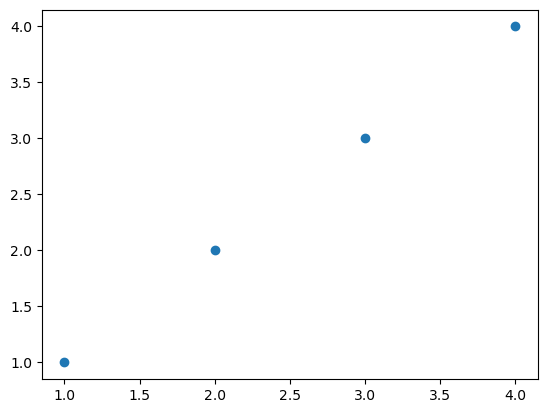

In [500]:
plt.scatter([1,2,3,4], [1,2,3,4])
plt.show()

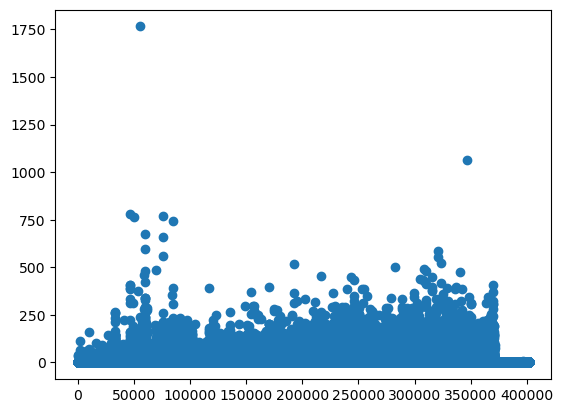

In [501]:
plt.scatter(ns_book7['번호'], ns_book7['대출건수'])
plt.show()

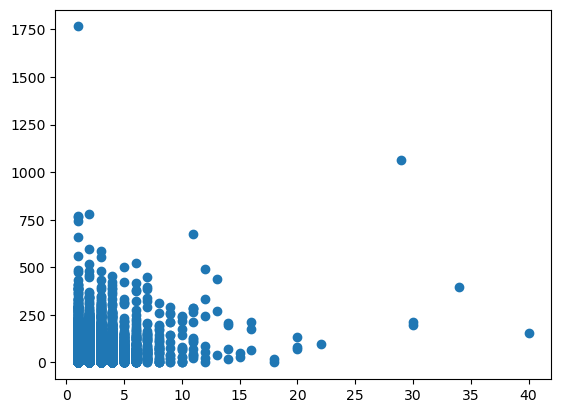

In [502]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'])
plt.show()

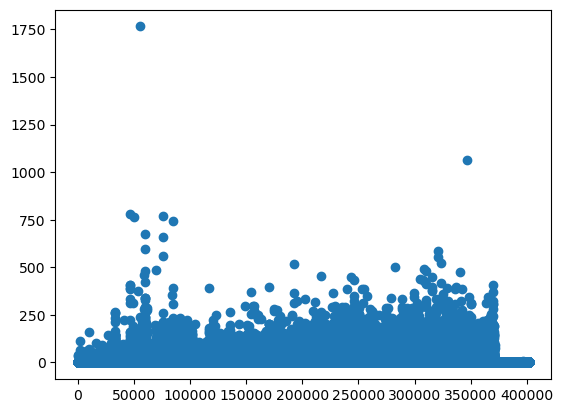

In [503]:
plt.scatter(ns_book7['번호'], ns_book7['대출건수'])
plt.show()

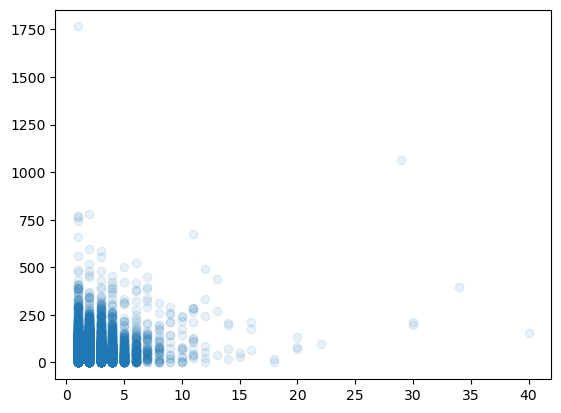

In [504]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

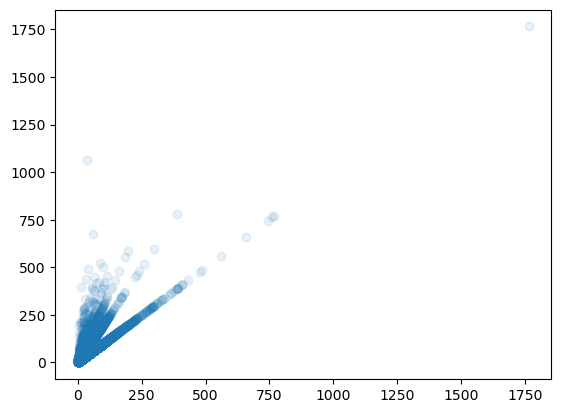

In [505]:
average_borrows = ns_book7['대출건수']/ns_book7['도서권수']
plt.scatter(average_borrows, ns_book7['대출건수'], alpha=0.1)
plt.show()

## 히스토그램 그리기

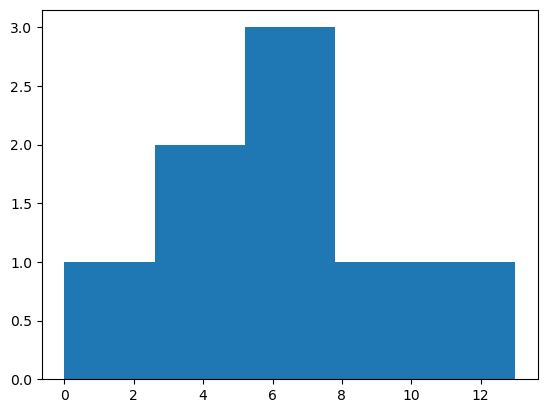

In [506]:
plt.hist([0,3,5,6,7,7,9,13], bins=5)
plt.show()

In [507]:
np.histogram_bin_edges([0,3,5,6,7,7,9,13], bins=5)

array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. ])

In [508]:
np.random.seed(42)
random_samples = np.random.randn(1000)

In [509]:
print(np.mean(random_samples), np.std(random_samples))

0.01933205582232549 0.9787262077473543


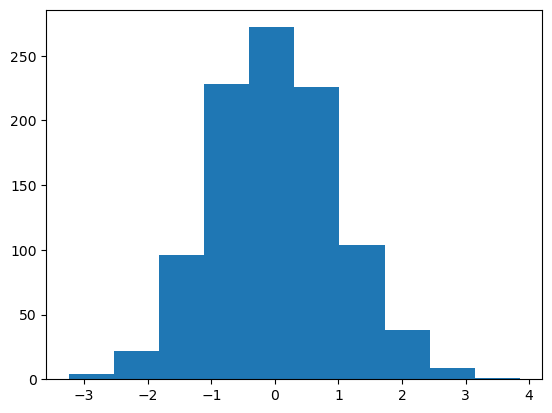

In [510]:
plt.hist(random_samples)
plt.show()

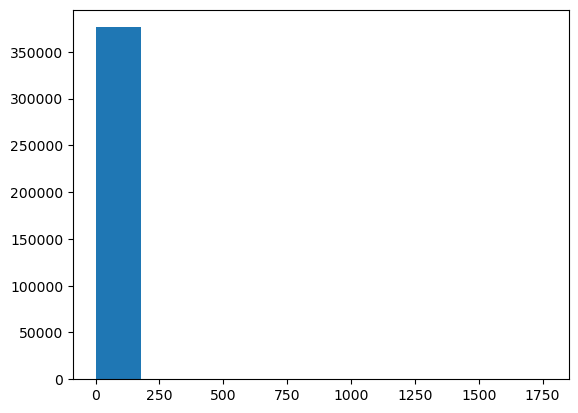

In [511]:
plt.hist(ns_book7['대출건수'])
plt.show()

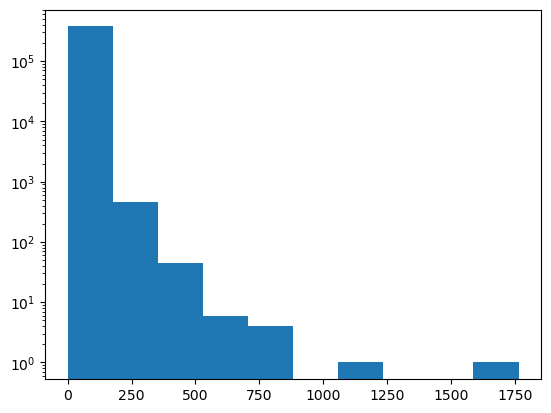

In [512]:
plt.hist(ns_book7['대출건수'])
plt.yscale('log')
plt.show()

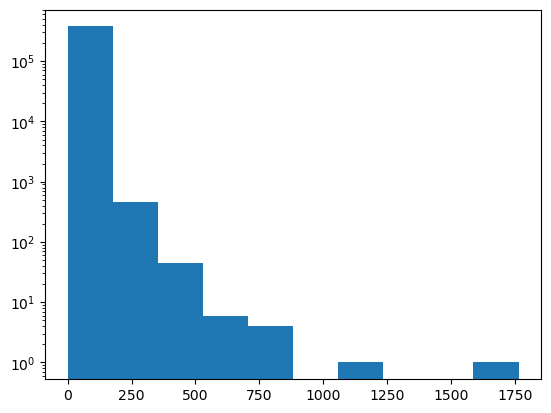

In [513]:
plt.hist(ns_book7['대출건수'], log=True)
plt.show()

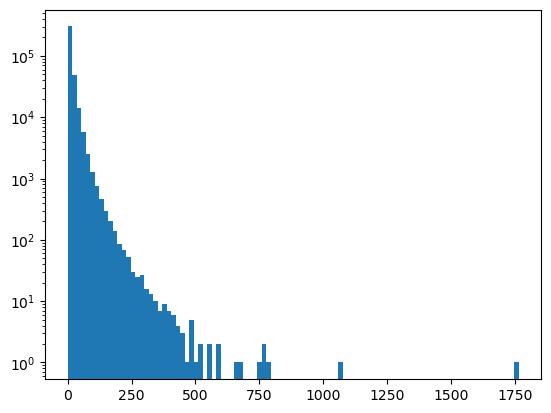

In [514]:
plt.hist(ns_book7['대출건수'], bins=100)
plt.yscale('log')
plt.show()

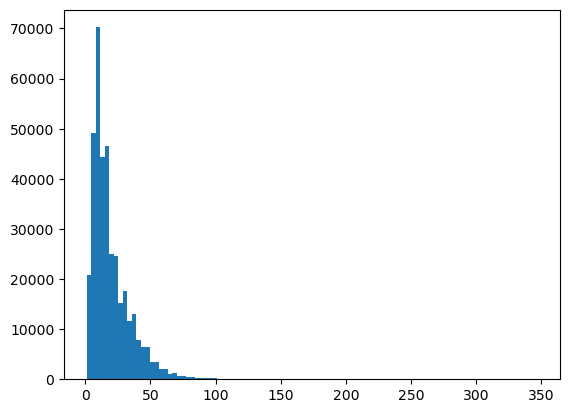

In [515]:
title_len = ns_book7['도서명'].apply(len)
plt.hist(title_len, bins=100)
plt.show()

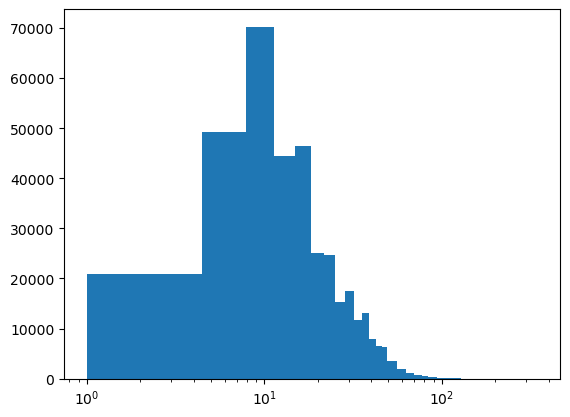

In [516]:
plt.hist(title_len, bins=100)
plt.xscale('log')
plt.show()

## 상자 수염 그림 그리기

In [517]:
temp = ns_book7[['대출건수','도서권수']]

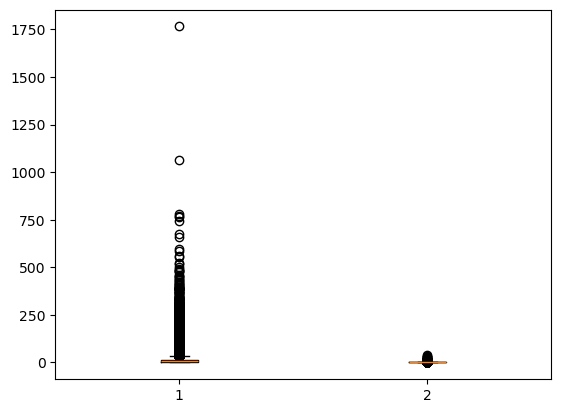

In [518]:
plt.boxplot(temp)
plt.show()

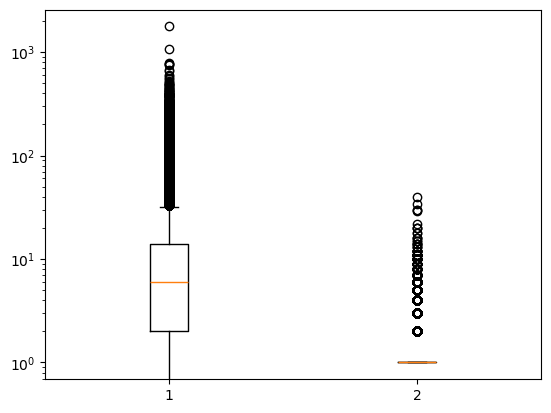

In [519]:
plt.boxplot(ns_book7[['대출건수','도서권수']])
plt.yscale('log')
plt.show()

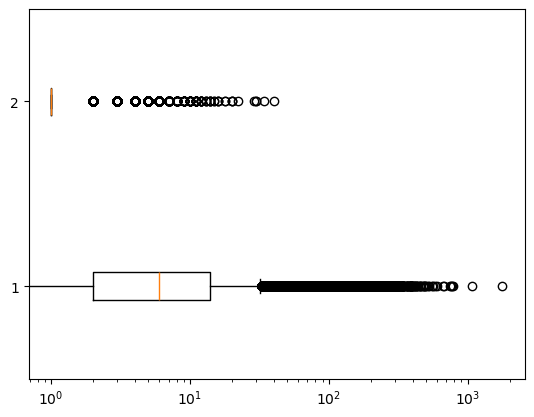

In [520]:
plt.boxplot(ns_book7[['대출건수','도서권수']], vert=False)
plt.xscale('log')
plt.show()

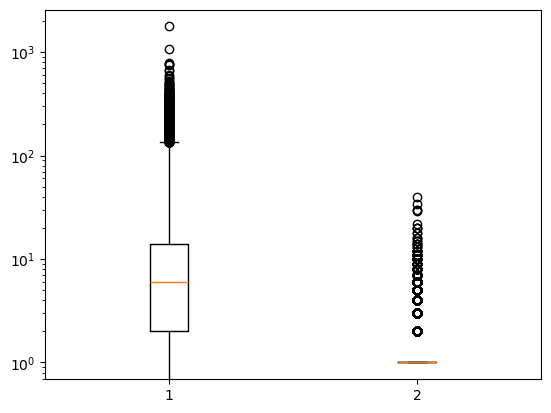

In [521]:
plt.boxplot(ns_book7[['대출건수','도서권수']], whis=10)
plt.yscale('log')
plt.show()

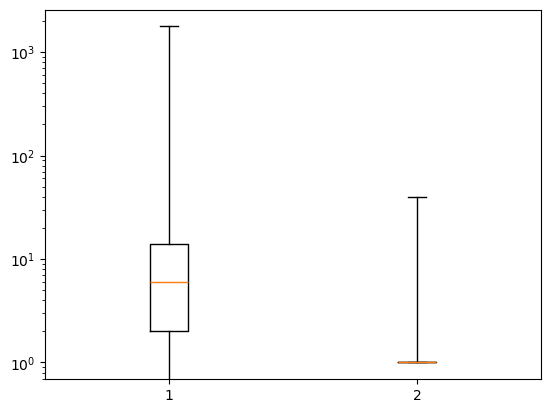

In [522]:
plt.boxplot(ns_book7[['대출건수','도서권수']], whis=(0,100))
plt.yscale('log')
plt.show()

## 판다스의 그래프 함수

### 산점도 그리기

c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DA

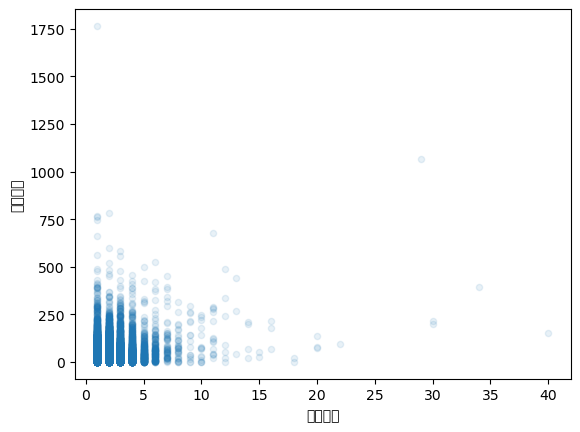

In [523]:
ns_book7.plot.scatter('도서권수', '대출건수', alpha=0.1)
plt.show()

### 히스토그램 그리기

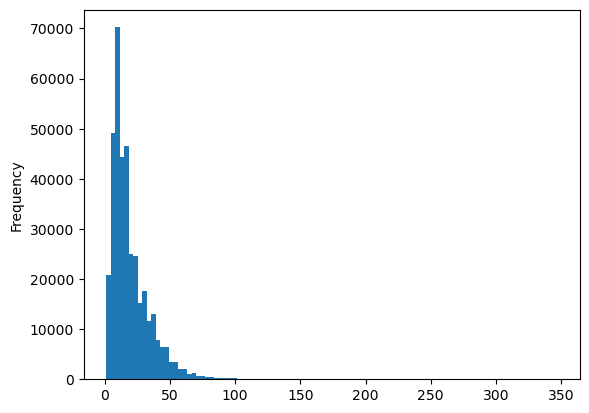

In [524]:
ns_book7['도서명'].apply(len).plot.hist(bins=100)
plt.show()

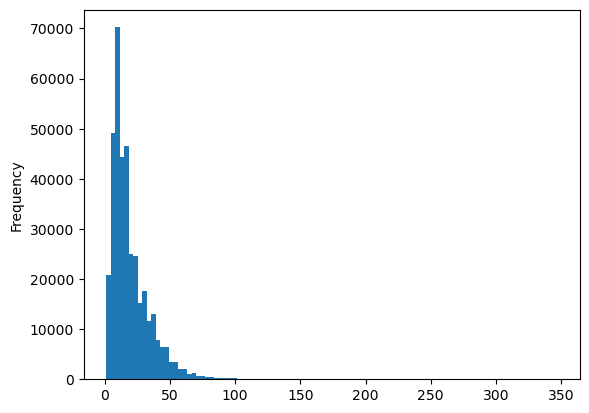

In [525]:
ns_book7['도서명'].apply(len).plot.hist(bins=100)
plt.show()

### 상자 수염 그림 그리기

c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khw27\anaconda3\envs\SDATA311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO

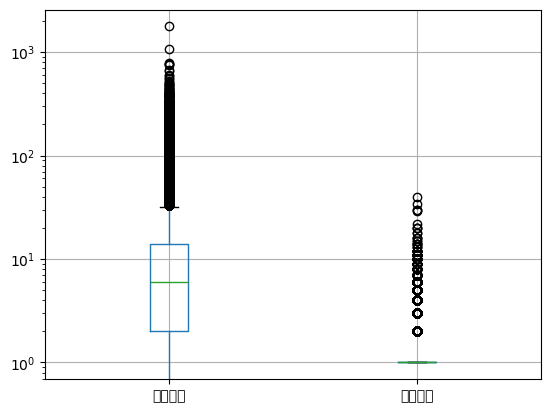

In [526]:
ns_book7[['대출건수','도서권수']].boxplot()
plt.yscale('log')
plt.show()

## 4-2) 확인문제

1. 다음 중 맷플롯립 함수로 그릴 수 있는 알맞은 그래프를 짝 지어 보세요.
- (1) scatter() - 산점도
- (2) hist() - 히스토그램
- (3) boxplot() - 상자 수염 그림

2. 다음 중 산점도에 대한 설명으로 올바른 것은 무엇인가요?
- (2) 3개 이상의 특성을 산점도로 표현할 순 있지만 그림으로 이해하기가 어려워짐

3. 다음 중 히스토그램의 설명으로 잘못된 것은 무엇인가요?
- (4) 두 특성(변수) 간의 상관관계를 파악할 수 있는 그래프는 박스플롯입니다

4. 상자 수염 그림에서 이상치에 대한 설명으로 옳은 것은 무엇인가요?
(3) 박스플롯 그래프에서 이상치는 수염의 끝에 최대 최소 값 사이에 놓인 데이터를 표시해줍니다.

5. ns_book7 남산도서관 대출 데이터에서 1980년~2022년 사이에 발행된 도서를 선택하여 다음과 같은 '발행년도' 열의 히스토그램을 그려보세요.


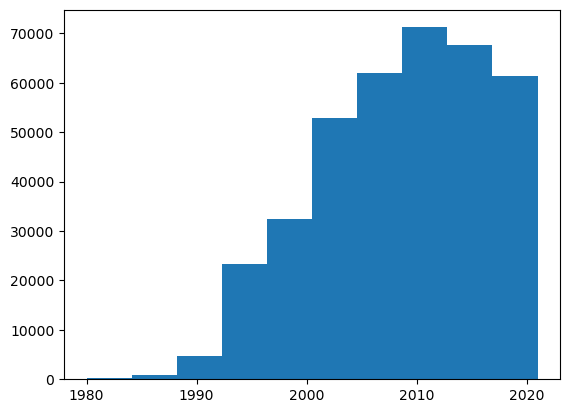

In [528]:
selected_rows = (1980 <= ns_book7['발행년도']) & (ns_book7['발행년도'] <= 2022)
plt.hist(ns_book7.loc[selected_rows, '발행년도'])
plt.show()

6. 문제 5번에서 선택한 도서로 '발행년도'열의 상자 수염 그림을 그려보세요.

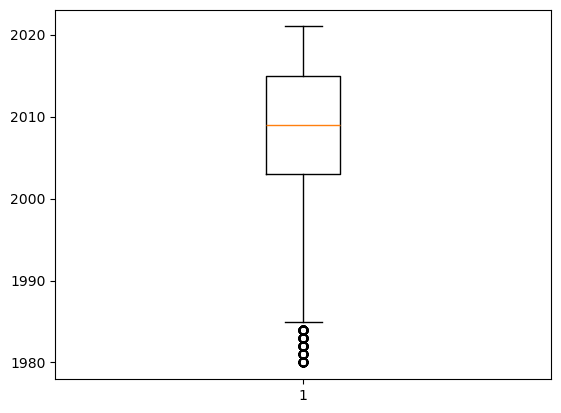

In [529]:
plt.boxplot(ns_book7.loc[selected_rows, '발행년도'])
plt.show()